In [1]:
import numpy as np 
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import csv
import math
from matplotlib.patches import Rectangle

In [2]:
constellations=["starlink","kuiper","oneweb","iridium"]
policy="P_OPT"

In [3]:
# gs_type = "single"
label = "distributed"
single_upbound=[2000,10000,20000,30000]
result={}
name_s=['SpaceCore','NTN','SkyCore','DPCM','Tiansuan']

In [4]:
def zero_out_mean(data):
    tmp=[]
    for item in data:
        if item !=0:
            tmp.append(item)
    if tmp:
        return np.mean(tmp)  
    else:
        return 0
def zero_out_min(data):
    tmp=[]
    for item in data:
        if item!=0:
            tmp.append(item)
    if tmp:
        return np.min(tmp)
    else:
        return float('inf')
def zero_out_max(data):
    tmp=[]
    for item in data:
        if item!=0:
            tmp.append(item)
    if tmp:
        return np.max(tmp)
    else:
        return 0

In [5]:
result_mobility_signaling={}
result_session_signaling={}
for constellation in constellations:
    print(constellation)
    path="data/"
    if constellation=="starlink":
        path+="starlink_72_22/"
    elif constellation=="kuiper":
        path+="kuiper/"
    elif constellation=="oneweb":
        path+="OneWeb-1week/"
    elif constellation=="iridium":
        path+="Iridium_1week/"
    result1={}
    result2={}
    for num in single_upbound:
        tmp_mobility=[]
        tmp_pdu_session=[]
        for i in range(len(name_s)):
            s_index=i
            tmp_mobility.append(np.array(np.load(path+"opt_handover/satellite/"+label+"_solution_"+name_s[s_index]+"_state_"+str(num)+"_mobility.npy")))
            tmp_pdu_session.append(np.array(np.load(path+"opt_handover/satellite/"+label+"_solution_"+name_s[s_index]+"_state_"+str(num)+"_session.npy")))
        result1[num]=tmp_mobility
        result2[num]=tmp_pdu_session
    constellations_mobility_signaling={}
    constellations_session_signaling={}
    for num in single_upbound:
        tmp1=result1[num]
        tmp2=result2[num]
        print(np.shape(tmp1))
        scenario_mobility_signaling=[]
        scenario_session_signaling=[]
        for scenario in tmp1:
            tmp_signaling=[]
            for mins in scenario:
                signaling_min=[x[0]for x in mins]
                tmp_signaling.append(signaling_min)
            per_sat_signaling=[[r[col]/60 for r in tmp_signaling] for col in range(len(tmp_signaling[0]))] 
            t_signaling=[np.mean(sat) for sat in per_sat_signaling]
            scenario_mobility_signaling.append(t_signaling)
        constellations_mobility_signaling[num]=scenario_mobility_signaling
        for scenario in tmp2:
            tmp_signaling=[]
            for mins in scenario:
                signaling_min=[x[0]for x in mins]
                tmp_signaling.append(signaling_min)
            per_sat_signaling=[[r[col]/60 for r in tmp_signaling] for col in range(len(tmp_signaling[0]))]
            t_signaling=[zero_out_mean(sat) for sat in per_sat_signaling]
            scenario_session_signaling.append(t_signaling)
        constellations_session_signaling[num]=scenario_session_signaling
    result_mobility_signaling[constellation]=constellations_mobility_signaling
    result_session_signaling[constellation]=constellations_session_signaling
    print(np.shape(constellations_session_signaling[10000]))

starlink
(5, 99, 1584, 2)
(5, 99, 1584, 2)
(5, 99, 1584, 2)
(5, 99, 1584, 2)
(5, 1584)
kuiper
(5, 99, 1156, 2)
(5, 99, 1156, 2)
(5, 99, 1156, 2)
(5, 99, 1156, 2)
(5, 1156)
oneweb
(5, 99, 720, 2)
(5, 99, 720, 2)
(5, 99, 720, 2)
(5, 99, 720, 2)
(5, 720)
iridium
(5, 99, 66, 2)
(5, 99, 66, 2)
(5, 99, 66, 2)
(5, 99, 66, 2)
(5, 66)


In [6]:
sat_all={}
for constellation in constellations:
    tmp_sat={}
    for num in single_upbound:
        tt_sat=[]
        for s in range(len(result_mobility_signaling[constellation][num])):
            tt_sat.append([result_mobility_signaling[constellation][num][s][i] + result_session_signaling[constellation][num][s][i]for i in range(len(result_mobility_signaling[constellation][num][s]))])
        print(np.shape(tt_sat))
        tmp_sat[num]=tt_sat
    sat_all[constellation]=tmp_sat

(5, 1584)
(5, 1584)
(5, 1584)
(5, 1584)
(5, 1156)
(5, 1156)
(5, 1156)
(5, 1156)
(5, 720)
(5, 720)
(5, 720)
(5, 720)
(5, 66)
(5, 66)
(5, 66)
(5, 66)


In [18]:
#UE与gs的配对关系
distributed_file="data/pairs.npy"
pair=np.array(np.load(distributed_file,allow_pickle=True))
print(np.shape(pair))

(10000,)


In [19]:
cycle=100
def cal_handover():
    r=[]
    for t in range(1,cycle):
        r_in=[]
        for i in range(len(ue_access)):
            if ue_access[i][t-1] != ue_access[i][t]:
                r_in.append(i)
        r.append(r_in)
    return r
handover_result={}
for constellation in constellations:
    path="data/"
    if constellation=="starlink":
        path+="starlink_72_22/"
    elif constellation=="kuiper":
        path+="kuiper/"
    elif constellation=="oneweb":
        path+="OneWeb-1week/"
    elif constellation=="iridium":
        path+="Iridium_1week/"
    ue_access_file=path+constellation+"_ue_access_"+policy+".npy"
    ue_access=np.array(np.load(ue_access_file,allow_pickle=True))
    ho=cal_handover()
    print(np.shape(ho))
    handover_result[constellation]=ho

C:\Users\DELL\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(99,)
(99,)
(99,)
(99,)


In [25]:
#mobility
pdu_gsl=[[0,0],[3,40],[0,0],[0,0],[0,0]]
mobility_gsl=[[[0,0],[2,17],[0,0],[5,7],[5,7]],[[0,0],[1,0],[0,0],[1,1],[1,1]]]
gsl_mobility_signaling={}
for constellation in constellations:
    path="data/"
    if constellation=="starlink":
        path+="starlink_72_22/"
    elif constellation=="kuiper":
        path+="kuiper/"
    elif constellation=="oneweb":
        path+="OneWeb-1week/"
    elif constellation=="iridium":
        path+="Iridium_1week/"
    ue_access_file=path+constellation+"_ue_access_"+policy+".npy"
    ue_access=np.array(np.load(ue_access_file,allow_pickle=True))
    bound_signaling=[]
    for b_index in range(len(single_upbound)):    
        ratio_file="data/processed_data/"+constellation+"_per_user_ratio"+str(single_upbound[b_index])+".npy"
        ratio=np.array(np.load(ratio_file,allow_pickle=True))
        s_signaling=[]
        for s_index in range(len(name_s)):
            time_signaling=[]
            for c in range(len(handover_result[constellation])):
                gs_signaling=[0.0]*39
                for user in handover_result[constellation][c]:
                    cur_sat=ue_access[user][c]-1
                    cur_gs=pair[user]
                    r=ratio[c][cur_sat]
                    gs_signaling[cur_gs]+=(r*(mobility_gsl[0][s_index][0]+mobility_gsl[1][s_index][0]))
                time_signaling.append(gs_signaling)
            s_signaling.append(time_signaling)
        bound_signaling.append(s_signaling)
    print(np.shape(bound_signaling))
    gsl_mobility_signaling[constellation]=bound_signaling
    

(4, 5, 99, 39)
(4, 5, 99, 39)
(4, 5, 99, 39)
(4, 5, 99, 39)


In [26]:
#pdu
pdu_gsl=[[0,0],[3,40],[0,0],[0,0],[0,0]]
mobility_gsl=[[[0,0],[2,17],[0,0],[5,7],[5,7]],[[0,0],[1,0],[0,0],[1,1],[1,1]]]
gsl_session_signaling={}
for constellation in constellations:
    path="data/"
    if constellation=="starlink":
        path+="starlink_72_22/"
    elif constellation=="kuiper":
        path+="kuiper/"
    elif constellation=="oneweb":
        path+="OneWeb-1week/"
    elif constellation=="iridium":
        path+="Iridium_1week/"
    ue_access_file=path+constellation+"_ue_access_"+policy+".npy"
    ue_access=np.array(np.load(ue_access_file,allow_pickle=True))
    bound_signaling=[]
    for b_index in range(len(single_upbound)):    
        ratio_file="data/processed_data/"+constellation+"_per_user_ratio"+str(single_upbound[b_index])+".npy"
        ratio=np.array(np.load(ratio_file,allow_pickle=True))
        s_signaling=[]
        for s_index in range(len(name_s)):
            time_signaling=[]
            for c in range(len(handover_result[constellation])):
                gs_signaling=[0.0]*39
                if c%2==0:
                    for user in range(len(ue_access)):
                        cur_sat=ue_access[user][c]-1
                        cur_gs=pair[user]
                        r=ratio[c+1][cur_sat]
                        gs_signaling[cur_gs]+=(r*pdu_gsl[s_index][0])
                time_signaling.append(gs_signaling)
            s_signaling.append(time_signaling)
        bound_signaling.append(s_signaling)
    print(np.shape(bound_signaling))
    gsl_session_signaling[constellation]=bound_signaling
    

(4, 5, 99, 39)
(4, 5, 99, 39)
(4, 5, 99, 39)
(4, 5, 99, 39)


In [42]:
np.save("data/gsl_session_signaling.npy",gsl_session_signaling)
np.save("data/gsl_mobility_signaling.npy",gsl_mobility_signaling)

In [7]:
gsl_session_signaling=np.load("data/gsl_session_signaling.npy",allow_pickle=True)
gsl_mobility_signaling=np.load("data/gsl_mobility_signaling.npy",allow_pickle=True)

starlink
Satellite
30000 [1.0, 122.17716694254533, 5.0, 40.31619087732208, 49.31619087732208]
kuiper
Satellite
30000 [1.0, 87.69148129166433, 5.000000000000001, 33.8153674179066, 42.81536741790661]
oneweb
Satellite
30000 [1.0, 49.813951337159615, 4.999999999999999, 16.83053574700705, 25.830535747007048]
iridium
Satellite
30000 [1.0, 34.501289429509896, 4.999999999999999, 7.725462699036478, 16.725462699036477]


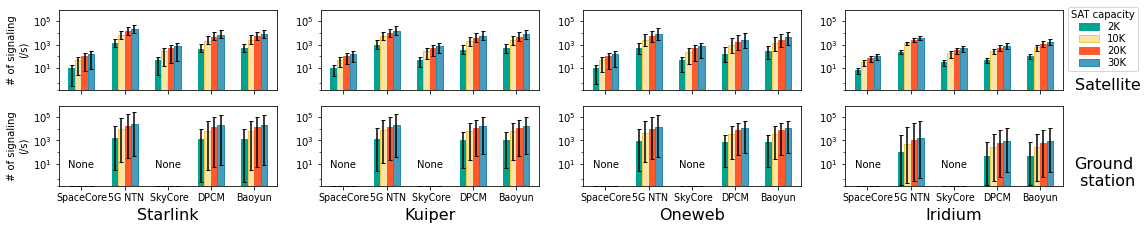

In [10]:
#画图
#byte=num of signaling 
#num=num of states
color=["#00A491","#FAE4A5","#FF592D","#489DBC"]
edgecolor=["#00A491","#F6C845","#FF592D","#278BB0"]
user_label=["2K","10K","20K","30K"]
title=["Starlink","Kuiper","Oneweb","Iridium"]
width=1.5
offset=[-3*width/2,-width/2,width/2,3*width/2]
location=[10,20,30,40,50]
fig, _ = plt.subplots(2,5,sharex=True,figsize=(18,5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
for c in range(len(constellations)):
    constellation=constellations[c]
    print(constellation)
    constellations_byte=result_session_signaling[constellation]
    constellations_num=result_mobility_signaling[constellation]
    
    all_signal_mean={}
    all_signal_y={}
    for num in single_upbound:
        all_signal_mean[num]=[zero_out_mean(ss) for ss in sat_all[constellation][num] ]
        tmp_max=[zero_out_max(ss) for ss in sat_all[constellation][num] ]
        tmp_min=[zero_out_min(ss) for ss in sat_all[constellation][num]]
        all_signal_y[num]=[]
        y1=[]
        y2=[]
        for s in range(len(tmp_max)):
            y1.append(all_signal_mean[num][s]-tmp_min[s])
            y2.append(tmp_max[s]-all_signal_mean[num][s])
        all_signal_y[num].append(y1)
        all_signal_y[num].append(y2)
    bound_test=30000
    print("Satellite")
    print(str(bound_test)+" "+str([item/all_signal_mean[bound_test][0] for item in all_signal_mean[bound_test]]))
    plt.subplot(3,4,c+1)
    plt.yscale("symlog")
    for i in range(len(single_upbound)):
        plt.bar([n+offset[i] for n in location],all_signal_mean[single_upbound[i]],yerr=all_signal_y[single_upbound[i]],color=color[i],edgecolor=edgecolor[i],width=width,capsize=2)
    plt.xticks(location,["","","","",""])  
    if constellation=="starlink":
        plt.ylabel("# of signaling\n(/s)")
    plt.ylim([0,8e5])
    plt.yticks([1e1,1e3,1e5],['$ \mathit{10}^{1}$','$ \mathit{10}^{3}$','$ \mathit{10}^{5}$'])
    if c==3:
        plt.legend(["2K","10K","20K","30K"],title="SAT capacity",loc="upper left", bbox_to_anchor=(1, 1.1),ncol=1,labelspacing=0.2,borderpad=0.3)#prop={'size': 8}
    if constellation=="starlink":
        plt.ylabel("# of signaling\n(/s)")
    if constellation=="iridium":
        plt.text(58,0,"Satellite",fontsize=16)
    
    
    signal_gs_mean={}
    signal_gs_y={}
    for b_index in range(len(single_upbound)):
        num=single_upbound[b_index]
        signal_gs_mean[num]=[]
        all_max=[]
        all_min=[]
        for s_index in range(len(name_s)):
            gs_all_tmp=[]
            for gs_index in range(39):
                gs_all_tmp.append([(gsl_session_signaling.item()[constellation][b_index][s_index][i][gs_index]+gsl_mobility_signaling.item()[constellation][b_index][s_index][i][gs_index])/60 for i in range(len(gsl_session_signaling.item()[constellation][b_index][s_index]))])
            signal_gs_mean[num].append(zero_out_mean([zero_out_mean(gs) for gs in gs_all_tmp]))
            all_max.append(zero_out_max([zero_out_max(gs) for gs in gs_all_tmp]))
            all_min.append(zero_out_min([zero_out_min(gs) for gs in gs_all_tmp]))
        signal_gs_y[num]=[]                          
        y5=[]
        y6=[]
        for i in range(len(signal_gs_mean[num])):
            y5.append(signal_gs_mean[num][i]-all_min[i])
            y6.append(all_max[i]-signal_gs_mean[num][i])
            
        signal_gs_y[num].append(y5)
        signal_gs_y[num].append(y6)
    plt.subplot(3,4,c+5)
#     print("GS")
#     print("gound stations:"+str([item for item in signal_gs_mean[bound_test]]))
    for i in range(len(single_upbound)):
        plt.bar([n+offset[i] for n in location],signal_gs_mean[single_upbound[i]],yerr=signal_gs_y[single_upbound[i]],color=color[i],edgecolor=edgecolor[i],width=width,capsize=2)
    plt.yscale("symlog")
    plt.text(7,5,"None",fontsize=10)
    plt.text(27,5,"None",fontsize=10)
    if constellation=="starlink":
        plt.ylabel("# of signaling\n(/s)")
    plt.ylim([0,8e5])
    plt.yticks([1e1,1e3,1e5],['$ \mathit{10}^{1}$','$ \mathit{10}^{3}$','$ \mathit{10}^{5}$'])
    plt.xticks(location,["","","","",""])
    if constellation=="iridium":
        plt.text(58,0,"Ground\n station",fontsize=16)
        
    plt.title(title[c],y=-0.5,fontsize=16)
    plt.xticks(location,["SpaceCore"," 5G NTN"," SkyCore","DPCM","Baoyun"],fontsize=9.5)

plt.savefig("figure20.pdf",bbox_inches='tight')  